In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
stock_symbol = "MSFT"
epoch_count = 20
data = pd.read_csv('csv/' + stock_symbol + '.timeseries.csv', date_parser = True)
data.tail()

,date,open,high,low,close,volume,adjclose
8514,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,0.063107
8515,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,0.064224
8516,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,0.065899
8517,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,0.064783
8518,1986-03-13,0.088542,0.101562,0.088542,0.097222,1031788800,0.062549


In [3]:
data_training = data[data['date'] < '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_training

,date,open,high,low,close,volume,adjclose
8518,1986-03-13,0.088542,0.101562,0.088542,0.097222,1031788800,0.062549
8517,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,0.064783
8516,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,0.065899
8515,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,0.064224
8514,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,0.063107
8513,1986-03-20,0.098090,0.098090,0.094618,0.095486,58435200,0.061432
8512,1986-03-21,0.095486,0.097222,0.091146,0.092882,59990400,0.059756
8511,1986-03-24,0.092882,0.092882,0.089410,0.090278,65289600,0.058081
8510,1986-03-25,0.090278,0.092014,0.089410,0.092014,32083200,0.059198
8509,1986-03-26,0.092014,0.095486,0.091146,0.094618,22752000,0.060873


In [4]:
data_test = data[data['date'] >= '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_test

,date,open,high,low,close,volume,adjclose
249,2019-01-02,99.550003,101.750000,98.940002,101.120003,35329300,99.646614
248,2019-01-03,100.099998,100.190002,97.199997,97.400002,42579100,95.980820
247,2019-01-04,99.720001,102.510002,98.930000,101.930000,44060600,100.444817
246,2019-01-07,101.639999,103.269997,100.980003,102.059998,35656100,100.572922
245,2019-01-08,103.040001,103.970001,101.709999,102.800003,31514400,101.302139
244,2019-01-09,103.860001,104.879997,103.239998,104.269997,32280800,102.750717
243,2019-01-10,103.220001,103.750000,102.379997,103.599998,30067600,102.090485
242,2019-01-11,103.190002,103.440002,101.639999,102.800003,28314200,101.302139
241,2019-01-14,101.900002,102.870003,101.260002,102.050003,28437100,100.563072
240,2019-01-15,102.510002,105.050003,101.879997,105.010002,31587600,103.479950


In [5]:
training_data = data_training.drop(['date', 'adjclose'], axis = 1)
training_data.head()

,open,high,low,close,volume
8518,0.088542,0.101562,0.088542,0.097222,1031788800
8517,0.097222,0.102431,0.097222,0.100694,308160000
8516,0.100694,0.103299,0.100694,0.102431,133171200
8515,0.102431,0.103299,0.098958,0.099826,67766400
8514,0.099826,0.100694,0.097222,0.098090,47894400


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00000000e+00, 8.22532308e-05, 0.00000000e+00, 6.01148236e-05,
        1.00000000e+00],
       [7.52661933e-05, 8.97307681e-05, 7.55873340e-05, 9.01722353e-05,
        2.97096179e-01],
       [1.05372671e-04, 9.72083695e-05, 1.05822268e-04, 1.05200877e-04,
        1.27119118e-01],
       ...,
       [8.60228982e-01, 8.70873823e-01, 8.38647131e-01, 8.75086263e-01,
        4.58428332e-02],
       [8.84420069e-01, 8.81383104e-01, 8.65814978e-01, 8.68247596e-01,
        3.48643321e-02],
       [8.77483579e-01, 8.81296944e-01, 8.73826073e-01, 8.78462304e-01,
        2.99856783e-02]])

In [7]:
x_train = []
y_train = []

In [8]:
training_data.shape[0]

8269

In [9]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape, y_train.shape

((8209, 60, 5), (8209,))

In [12]:
### Building LSTM

In [13]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout

Using Theano backend.


In [14]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))
               
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [15]:
regressior.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               96480     
__________

In [16]:
regressior.compile(optimizer='sgd', metrics=['mae', 'acc'], loss = 'mean_squared_error')

In [17]:
regressior.fit(x_train, y_train, epochs=epoch_count, batch_size=32)

C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not avai

Epoch 1/20
8209/8209 [==============================] - 82s 10ms/step - loss: 0.0386 - mean_absolute_error: 0.1417 - acc: 0.0000e+00
Epoch 2/20
8209/8209 [==============================] - 78s 9ms/step - loss: 0.0338 - mean_absolute_error: 0.1317 - acc: 0.0000e+00
Epoch 3/20
8209/8209 [==============================] - 78s 10ms/step - loss: 0.0309 - mean_absolute_error: 0.1255 - acc: 0.0000e+00
Epoch 4/20
8209/8209 [==============================] - 76s 9ms/step - loss: 0.0261 - mean_absolute_error: 0.1144 - acc: 0.0000e+00
Epoch 5/20
8209/8209 [==============================] - 74s 9ms/step - loss: 0.0180 - mean_absolute_error: 0.0937 - acc: 0.0000e+00
Epoch 6/20
8209/8209 [==============================] - 91s 11ms/step - loss: 0.0074 - mean_absolute_error: 0.0580 - acc: 1.2182e-04
Epoch 7/20
8209/8209 [==============================] - 82s 10ms/step - loss: 0.0020 - mean_absolute_error: 0.0316 - acc: 1.2182e-04
Epoch 8/20
8209/8209 [==============================] - 72s 9ms/step - l

In [18]:
### Prepare test dataset

In [19]:
data_test.tail()

,date,open,high,low,close,volume,adjclose
4,2019-12-20,157.350006,158.490005,156.289993,157.410004,53477500,157.410004
3,2019-12-23,158.119995,158.119995,157.270004,157.410004,17718200,157.410004
2,2019-12-24,157.479996,157.710007,157.119995,157.380005,8989200,157.380005
1,2019-12-26,157.559998,158.729996,157.399994,158.669998,14520600,158.669998
0,2019-12-27,159.449997,159.550003,158.220001,158.960007,18412800,158.960007


In [20]:
data_training.tail(60)

,date,open,high,low,close,volume,adjclose
309,2018-10-04,114.610001,114.760002,111.629997,112.790001,34821700,110.668488
308,2018-10-05,112.629997,113.169998,110.639999,112.129997,29068900,110.020897
307,2018-10-08,111.660004,112.029999,109.339996,110.849998,29640600,108.764969
306,2018-10-09,111.139999,113.080002,110.800003,112.260002,26198600,110.148453
305,2018-10-10,111.239998,111.500000,105.790001,106.160004,61376300,104.163193
304,2018-10-11,105.349998,108.930000,104.199997,105.910004,63904300,103.917892
303,2018-10-12,109.010002,111.239998,107.120003,109.570000,47742100,107.509056
302,2018-10-15,108.910004,109.480003,106.949997,107.599998,32068100,105.576111
301,2018-10-16,109.540001,111.410004,108.949997,111.000000,31610200,108.912148
300,2018-10-17,111.680000,111.809998,109.550003,110.709999,26548200,108.627602


In [21]:
past_60_days = data_training.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['date', 'adjclose'], axis = 1)
df.head()

,open,high,low,close,volume
0,114.610001,114.760002,111.629997,112.790001,34821700
1,112.629997,113.169998,110.639999,112.129997,29068900
2,111.660004,112.029999,109.339996,110.849998,29640600
3,111.139999,113.080002,110.800003,112.260002,26198600
4,111.239998,111.500000,105.790001,106.160004,61376300


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.99297679, 0.98776791, 0.97126471, 0.97558859, 0.03158638],
       [0.97580885, 0.97407137, 0.96264414, 0.96987524, 0.02599834],
       [0.96739836, 0.96425124, 0.95132416, 0.9587949 , 0.02655367],
       ...,
       [1.36468799, 1.35774595, 1.36737599, 1.36158331, 0.00649373],
       [1.36538166, 1.36653229, 1.36981413, 1.37275018, 0.01186671],
       [1.38176921, 1.37359596, 1.37695447, 1.37526065, 0.01564744]])

In [24]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [25]:
x_test, y_test = np.array(x_test),np.array(y_test)
x_test.shape, y_test.shape

((250, 60, 5), (250,))

In [26]:
y_pred = regressior.predict(x_test)

C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not avai

In [27]:
scaler.scale_

array([8.67066133e-03, 8.61415579e-03, 8.70765673e-03, 8.65653046e-03,
       9.71359655e-10])

In [28]:
scale = 1/8.67066133e-03
scale

115.33145649917803

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

In [30]:
### Visualize Data 

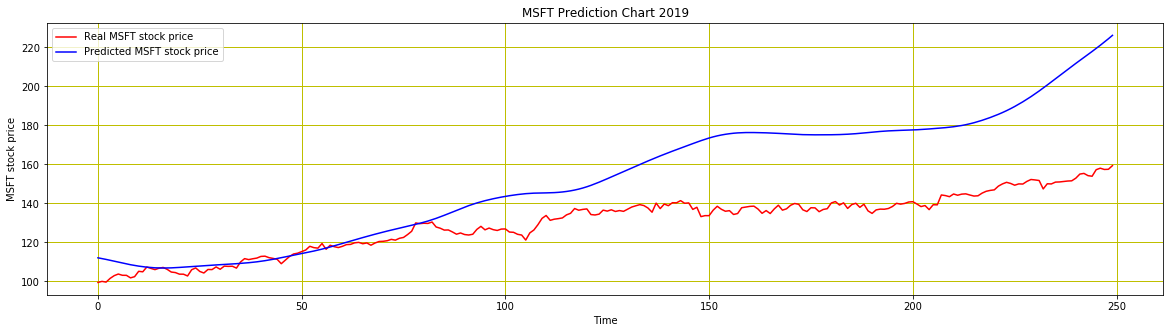

In [31]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label = 'Real ' + stock_symbol + ' stock price')
plt.plot(y_pred, color = 'blue', label = 'Predicted ' + stock_symbol + ' stock price')
plt.title(stock_symbol + ' Prediction Chart 2019')
plt.grid(color='y', linestyle='-', linewidth=1)
plt.xlabel('Time')
plt.ylabel(stock_symbol + ' stock price')
plt.legend()
plt.show()